<a href="https://colab.research.google.com/github/edfakie2/Sales-Predictions/blob/main/Copy_of_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [792]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
set_config(display='diagram')
filename = '/content/sales_predictions.csv'


In [793]:
def evaluate_model(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [794]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [795]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [796]:
df.duplicated().sum()


0

In [797]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [798]:
print(df['Outlet_Identifier'].unique())
print('\n')
print(df['Outlet_Location_Type'].unique().sum())
print('\n')
print(df['Outlet_Size'].unique())
print('\n')
print(df['Outlet_Type'].unique())


['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Tier 1Tier 3Tier 2


['Medium' nan 'High' 'Small']


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [799]:
Outlet_I_Filter1 = df['Outlet_Identifier'] == 'OUT010'
Outlet_I_Filter2 = df['Outlet_Identifier'] =='OUT045'
Outlet_I_Filter3 = df['Outlet_Identifier'] == 'OUT017'

In [800]:
Tier_Filter1 = df['Outlet_Location_Type'] == 'Tier 1'
Tier_Filter2 = df['Outlet_Location_Type'] == 'Tier 2'
Tier_Filter3 = df['Outlet_Location_Type'] == 'Tier 3'

In [801]:
Size_Filter1 = df['Outlet_Size'] == 'Small'
Size_Filter2 = df['Outlet_Size'] == 'Medium'
Size_Filter3 = df['Outlet_Size'] == 'High'
Size_Filter4 = df['Outlet_Size']

In [802]:
Outlet_Type_1 = df['Outlet_Type'] == 'Supermarket Type1'
Outlet_Type_2 = df['Outlet_Type'] == 'Supermarket Type2'
Outlet_Type_3 = df['Outlet_Type'] == 'Supermarket Type3'
Outlet_Type_4 = df['Outlet_Type'] == 'Grocery Store'

In [803]:
df=df.fillna("")

In [804]:
## Was the the only 'Grocery Store' Without a value for Small 
df.loc[Outlet_I_Filter1, 'Outlet_Size'] = df.loc[Outlet_I_Filter1, 'Outlet_Size'].replace('','Small')
df.loc[Outlet_I_Filter1, 'Outlet_Size']

3       Small
28      Small
30      Small
45      Small
65      Small
        ...  
8400    Small
8432    Small
8473    Small
8486    Small
8509    Small
Name: Outlet_Size, Length: 555, dtype: object

In [805]:
df.loc[Outlet_Type_1 & Tier_Filter2]
## Same Here The Missing Values for 'OUT17 and OUT045' seem to all be small because of the Corrilation between "Supermarket 1 and Tier 2"

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.6,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.0,Low Fat,0.099887,Household,45.9060,OUT017,2007,,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.8,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.0,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.0,Regular,0.054489,Canned,57.5904,OUT045,2002,,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.2850


In [806]:
df.loc[Outlet_I_Filter2, 'Outlet_Size'] = df.loc[Outlet_I_Filter2, 'Outlet_Size'].replace('','Small')
df.loc[Outlet_I_Filter3, 'Outlet_Size'] = df.loc[Outlet_I_Filter3, 'Outlet_Size'].replace('','Small')

In [807]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [808]:
## Item Weight was the only other missing value will handle before pipeine by droping column doesnt seem to be important for sales to me

In [809]:
df['Item_MRP'] = df['Item_MRP'].astype(int)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)
df['Item_Visibility'] = df['Item_Visibility'].astype(float)

In [810]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [811]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [812]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

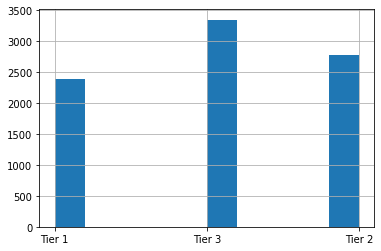

In [813]:
df['Outlet_Location_Type'].hist();

In [814]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2180.786577
std       1706.497259
min         33.000000
25%        833.500000
50%       1794.000000
75%       3101.000000
max      13086.000000
Name: Item_Outlet_Sales, dtype: float64

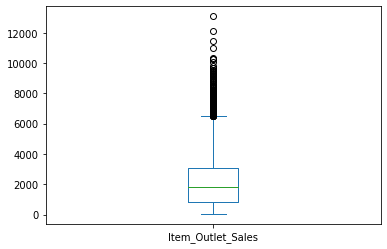

In [815]:
df['Item_Outlet_Sales'].plot(kind='box');

In [816]:
corr=df.corr()
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001292,-0.074834,-0.128629
Item_MRP,-0.001292,1.000000,0.005106,0.567516
Outlet_Establishment_Year,-0.074834,0.005106,1.000000,-0.049134
Item_Outlet_Sales,-0.128629,0.567516,-0.049134,1.000000


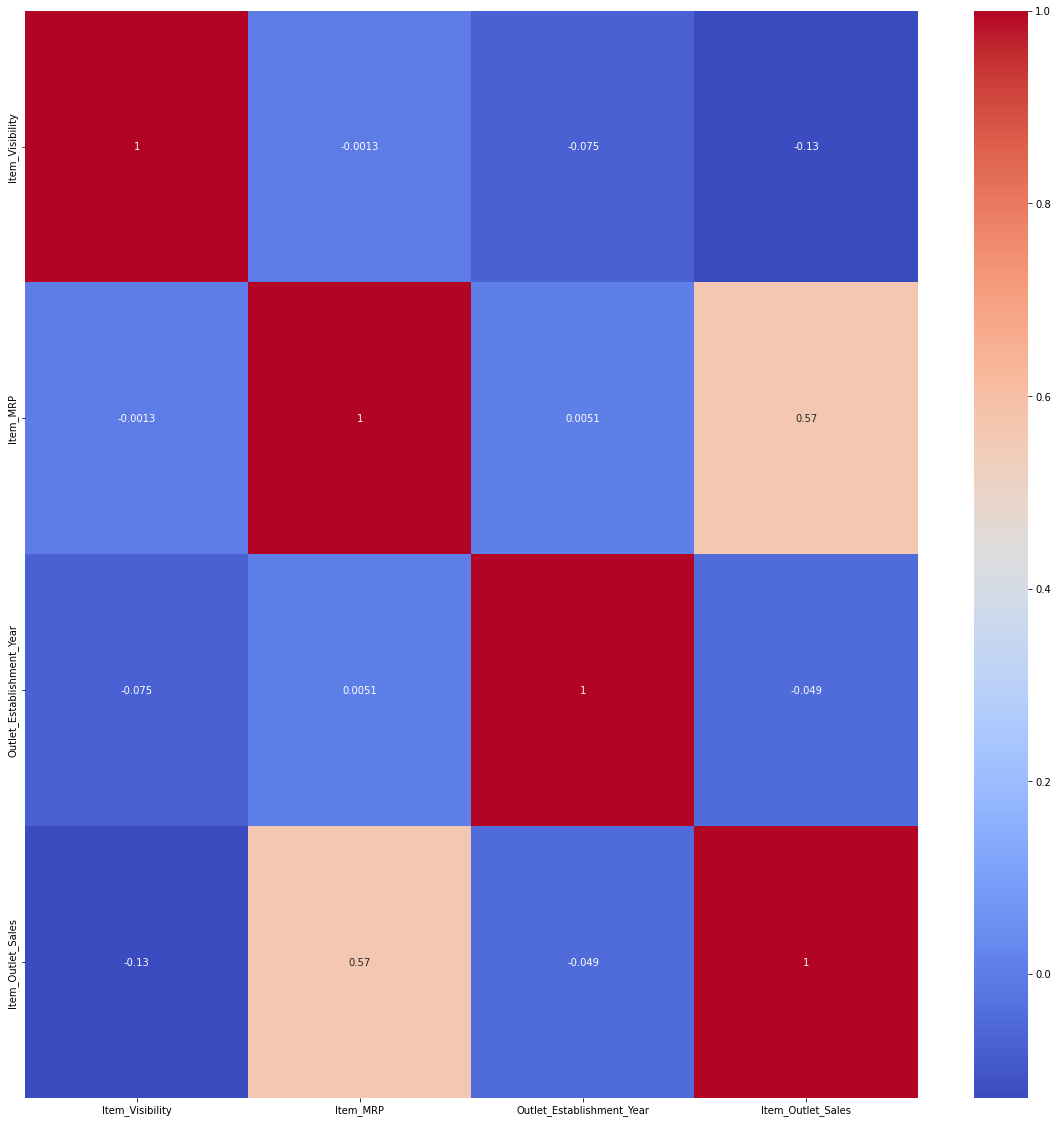

In [817]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm',annot=True);

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   int64  
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 799.2+ KB


In [819]:
df=df.drop(columns="Item_Weight")

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   int64  
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 732.6+ KB


In [821]:
print(df['Outlet_Size'].value_counts())
print('\n')
print(df['Outlet_Location_Type'].value_counts())
print('\n')
print(df['Outlet_Type'].value_counts())
print('\n')
print(df['Item_Fat_Content'].value_counts())

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [824]:
## I wanted to set up unique array for the strings/ nominal categorical variable

##Source:https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/

In [825]:
le = LabelEncoder()

In [826]:
label1 = le.fit_transform(df['Item_Identifier'])
label

array([ 156,    8,  662, ..., 1357,  681,   50])

In [827]:
label2 = le.fit_transform(df['Item_Fat_Content'])

In [828]:
label3 = le.fit_transform(df['Item_Type'])

In [829]:
label4 = le.fit_transform(df['Outlet_Identifier'])

In [830]:
df.drop('Item_Identifier',axis=1 , inplace=True)
df['Item_Identifier'] = label1

df.drop('Item_Fat_Content',axis=1 , inplace=True)
df['Item_Fat_Content'] = label2

df.drop('Item_Type',axis=1 , inplace=True)
df['Item_Type'] = label3

df.drop('Outlet_Identifier',axis=1 , inplace=True)
df['Outlet_Identifier'] = label4

In [831]:
df

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier
0,0.016047,249,1999,Medium,Tier 1,Supermarket Type1,3735,156,0,4,9
1,0.019278,48,2009,Medium,Tier 3,Supermarket Type2,443,8,1,14,3
2,0.016760,141,1999,Medium,Tier 1,Supermarket Type1,2097,662,0,10,9
3,0.000000,182,1998,Small,Tier 3,Grocery Store,732,1121,1,6,0
4,0.000000,53,1987,High,Tier 3,Supermarket Type1,994,1297,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214,1987,High,Tier 3,Supermarket Type1,2778,370,0,13,1
8519,0.046982,108,2002,Small,Tier 2,Supermarket Type1,549,897,1,0,7
8520,0.035186,85,2004,Small,Tier 2,Supermarket Type1,1193,1357,0,8,6
8521,0.145221,103,2009,Medium,Tier 3,Supermarket Type2,1845,681,1,13,3


In [832]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [833]:
##For the Ordinal Values
sizes = {'Small': 0, 'Medium': 1, 'High': 2}
tier = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3':2}
type_S = {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}

X_train['Outlet_Size'] = X_train['Outlet_Size'].replace(sizes)
X_train['Outlet_Location_Type'] = X_train['Outlet_Location_Type'].replace(tier)
X_train['Outlet_Type'] = X_train['Outlet_Type'].replace(type_S)

X_test['Outlet_Size'] = X_test['Outlet_Size'].replace(sizes)
X_test['Outlet_Location_Type'] = X_test['Outlet_Location_Type'].replace(tier)
X_test['Outlet_Type'] = X_test['Outlet_Type'].replace(type_S)

X_train.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier
4776,0.029565,256,2009,1,2,2,1324,0,9,3
7510,0.000000,179,2009,1,2,2,1063,1,13,3
5828,0.158716,157,1999,1,0,1,634,1,10,9
5327,0.014628,82,2004,0,1,1,407,0,0,6
4810,0.016645,120,2002,0,1,1,281,0,5,7


In [851]:
cat_selector = make_column_selector(dtype_include='object')

In [835]:
cat_selector = make_column_selector(dtype_include='object')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_tuple = (ohe, cat_selector)
transformer = make_column_transformer(ohe_tuple, remainder = StandardScaler())

In [836]:
dummy = DummyRegressor(strategy='mean')

dummy_pipe = make_pipeline(transformer, dummy)

dummy_pipe.fit(X_train, y_train)

train_preds = dummy_pipe.predict(X_train)
test_preds = dummy_pipe.predict(X_test)

evaluate_model(y_train, train_preds)
evaluate_model(y_test, test_preds)

scores: 
MAE: 1,360.22 
MSE: 2,959,443.26 
RMSE: 1,720.30 
R2: 0.00
scores: 
MAE: 1,326.12 
MSE: 2,772,149.22 
RMSE: 1,664.98 
R2: -0.00


In [837]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [838]:
train_preds2 = reg.predict(X_train)
test_preds2 = reg.predict(X_test)
evaluate_model(y_train, train_preds2)
evaluate_model(y_test, test_preds2)

scores: 
MAE: 914.93 
MSE: 1,472,225.14 
RMSE: 1,213.35 
R2: 0.50
scores: 
MAE: 870.64 
MSE: 1,365,923.91 
RMSE: 1,168.73 
R2: 0.50


In [839]:
bias = DecisionTreeRegressor(max_depth=None)
bias_pipe = make_pipeline(transformer, bias)
bias_pipe.fit(X_train, y_train)
evaluate_model(y_train, bias_pipe.predict(X_train))
evaluate_model(y_test, bias_pipe.predict(X_test))

scores: 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00
scores: 
MAE: 1,017.35 
MSE: 2,120,354.88 
RMSE: 1,456.14 
R2: 0.23


[Text(0.4305921476409082, 0.9857142857142858, 'X[1] <= 0.016\nsquared_error = 2959443.26\nsamples = 6392\nvalue = 2209.475'),
 Text(0.16269636643379964, 0.9571428571428572, 'X[5] <= -0.887\nsquared_error = 967080.702\nsamples = 3142\nvalue = 1360.108'),
 Text(0.027699270801657055, 0.9285714285714286, 'X[1] <= -1.022\nsquared_error = 21407.406\nsamples = 386\nvalue = 206.057'),
 Text(0.011532450634854958, 0.9, 'X[1] <= -1.469\nsquared_error = 5981.55\nsamples = 146\nvalue = 120.377'),
 Text(0.005533482554574595, 0.8714285714285714, 'X[1] <= -1.581\nsquared_error = 3243.226\nsamples = 76\nvalue = 89.895'),
 Text(0.002622172814149763, 0.8428571428571429, 'X[4] <= -0.15\nsquared_error = 3180.032\nsamples = 42\nvalue = 77.333'),
 Text(0.001076785794403705, 0.8142857142857143, 'X[1] <= -1.692\nsquared_error = 1281.678\nsamples = 21\nvalue = 56.81'),
 Text(0.00031904764278628295, 0.7857142857142857, 'X[6] <= -0.146\nsquared_error = 3582.16\nsamples = 5\nvalue = 82.2'),
 Text(0.000159523821393

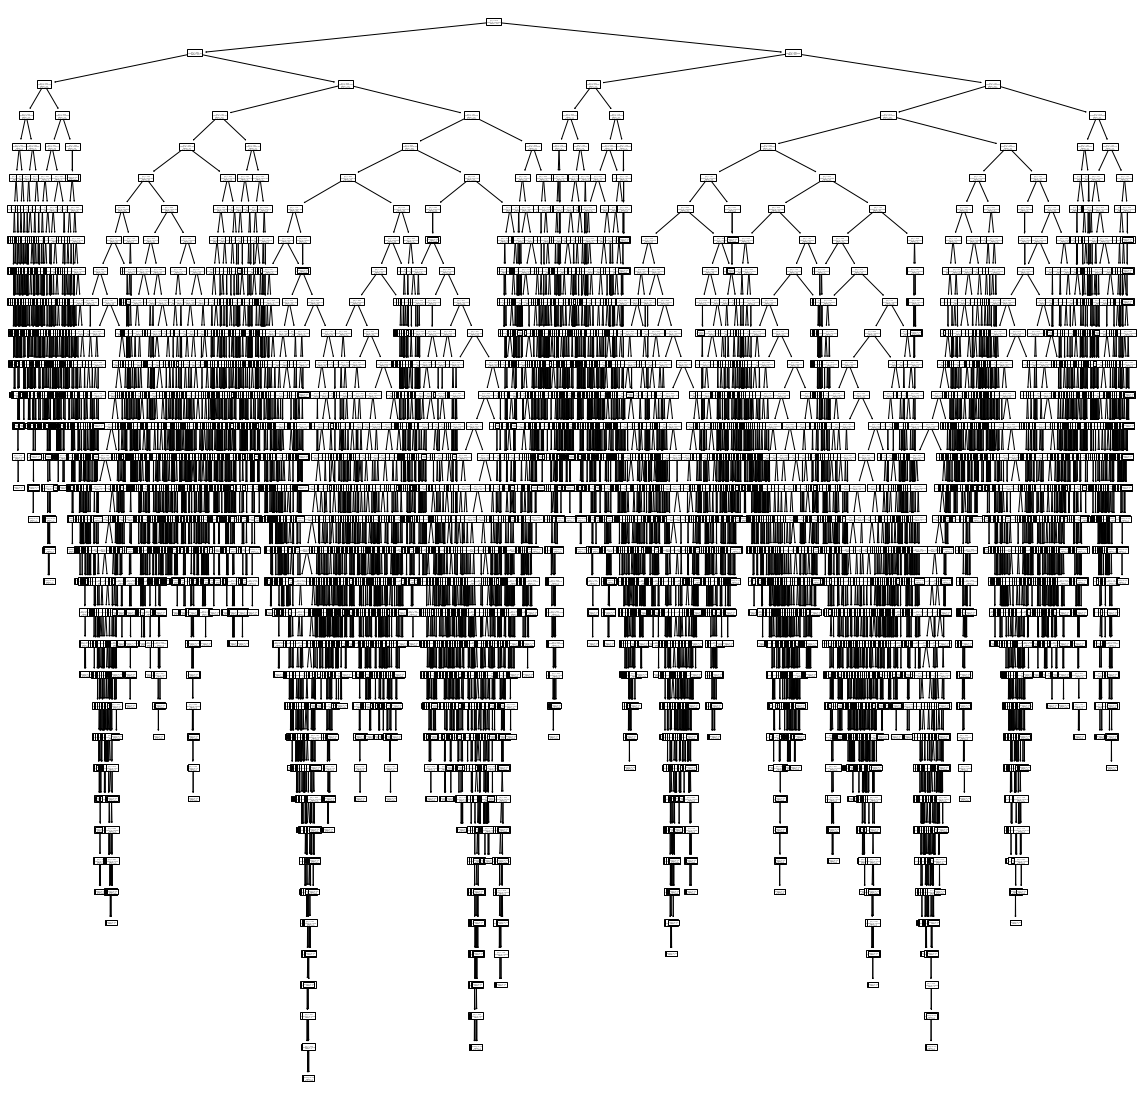

In [840]:
plt.figure(figsize=(20,20))
plot_tree(bias)

In [841]:
bias.get_depth()

34

In [842]:
depths = range(1, bias.get_depth()+1)
scores = pd.DataFrame(columns=['Train','Test'], index=depths)
for depth in depths:
  tree = DecisionTreeRegressor(max_depth=depth)
  tree_pipe = make_pipeline(transformer, tree)
  tree_pipe.fit(X_train, y_train)
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  r2_train = r2_score(y_train, train_pred)
  r2_test = r2_score(y_test, test_pred)
  scores.loc[depth, 'Train'] = r2_train
  scores.loc[depth, 'Test'] = r2_test

In [843]:
scores

,Train,Test
1,0.23567,0.231982
2,0.42944,0.435033
3,0.522398,0.525516
4,0.581252,0.586172
5,0.602607,0.595862
6,0.6131,0.584851
7,0.626868,0.571735
8,0.644878,0.558847
9,0.668773,0.545268
10,0.693728,0.512709


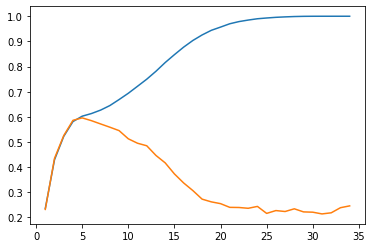

In [848]:
plt.plot(scores);

In [849]:
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

In [850]:
best_tree = DecisionTreeRegressor(max_depth=best_depth)
best_tree_pipe = make_pipeline(transformer, best_tree)
best_tree_pipe.fit(X_train, y_train)

evaluate_model(y_train, best_tree_pipe.predict(X_train))
evaluate_model(y_test, best_tree_pipe.predict(X_test))

scores: 
MAE: 763.98 
MSE: 1,176,063.34 
RMSE: 1,084.46 
R2: 0.60
scores: 
MAE: 736.37 
MSE: 1,115,009.84 
RMSE: 1,055.94 
R2: 0.60


In [847]:
## Using this Tree Regression We were able to get the best result. 